# Apprentissage supervisé - Classification
December 15, 2020

## 1 Préparation des données

### 1.1 Téléchargement de données

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml
import pandas as pd
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.base import BaseEstimator
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support, precision_recall_curve
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.preprocessing import StandardScaler

In [2]:
mnist = fetch_openml('mnist_784', version=1)

### 1.2 Information sur les données

#### 1. Le retour de la fonction "fetch_openml" est un dictionnaire (mnist). Affichez ces clés.

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

#### 2. En utilisant les clés du dictionnaire "mnist", affichez :

• La taille des données (le nombre des features et la taille de chaque feature). Par convention,
les données sont à stocker dans une variable "X".

In [4]:
print(mnist.data.shape)

(70000, 784)


• La taille des labels=classes (le nombre des labels). Par convention, les classes sont souvent
à stocker dans une variable "y"

In [5]:
print(mnist.target.shape)

(70000,)


• Les différentes classes de la base de données

In [6]:
unique_values, occurrence_count = np.unique(mnist.target, return_counts=True)
print(len(unique_values), "différents labels :", unique_values)
print("occurences de chacun :",occurrence_count)

10 différents labels : ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
occurences de chacun : [6903 7877 6990 7141 6824 6313 6876 7293 6825 6958]


• Une description détaillée de la base de données.

In [7]:
mnist.details

{'id': '554',
 'name': 'mnist_784',
 'version': '1',
 'format': 'ARFF',
 'upload_date': '2014-09-29T03:28:38',
 'licence': 'Public',
 'url': 'https://www.openml.org/data/v1/download/52667/mnist_784.arff',
 'file_id': '52667',
 'default_target_attribute': 'class',
 'tag': ['AzurePilot',
  'OpenML-CC18',
  'OpenML100',
  'study_1',
  'study_123',
  'study_41',
  'study_99',
  'vision'],
 'visibility': 'public',
 'status': 'active',
 'processing_date': '2020-11-20 20:12:09',
 'md5_checksum': '0298d579eb1b86163de7723944c7e495'}

#### 3. A travers cette question, vous avez dû conclure que la base de données MNIST contient 70000 images en niveau de gris, et chaque image est caractérisée par un features de taille 784=28*28.

• Affichez l’image de la première instance de la base de données.

In [8]:
X = mnist.data
y = mnist.target

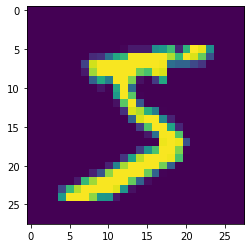

In [11]:
img1 = X[0].reshape(28,28)
plt.imshow(img1)

• Affichez la classe de la première instance

In [12]:
print(y[0])

5


#### 4. Affichez le type des labels (du premier label par exemple)

In [13]:
print("les labels sont du type", type(y[0]))

les labels sont du type <class 'str'>


#### 5. A travers la question précédente, vous avez dû remarquer que le type des labels est une chaîne de caractères. Il est préférable, dans les projets d’apprentissage automatique,d’utiliser des chiffres. 
Par conséquent, appliquez le casting sur les labels pour les transformer
à des entiers.

In [16]:
y = y.astype(int)
print("les labels sont maintenant du type", type(y[0]))

les labels sont maintenant du type <class 'numpy.int32'>


### 1.3 Répartition des données
Contrairement aux précédents projets, les données dans MNIST sont déjà partitionnées en
base d’apprentissage et en base de test. Les 60 000 premières images composeront la base
d’apprentissage et le reste des images constituera la base de test. 

• Écrivez un code qui met en exergue cette répartition tout en stockant les données de test d’apprentissage et les classes de test d’apprentissage dans 4 variables.

In [17]:
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

## 2 Apprentissage d’un classifieur binaire
Comme indiqué dans les objectifs, ce projet vise à classifier les chiffres. Une des solutions est
d’utiliser un classifieur binaire qui est apte d’identifier que l’image représente bien le chiffre que
nous cherchons ou non. Par exemple, nous nous focaliserons sur la reconnaissance du chiffre 5

### 2.1 Apprentissage des données

#### 1. En utilisant les labels d’apprentissage et de test, écrivez un code qui stocke dans deux variables (une première pour la base d’apprentissage et une autre pour la base de test) distinctes True si la classe de l’instance est 5 et False Sinon. 
De ce fait, nous traitons une classification binaire.

In [18]:
len(y_test)

10000

In [19]:
yisfive_train = np.zeros(60000)
yisfive_test = np.zeros(10000)

yisfive_train = np.where(y_train == 5, True, False)
yisfive_test = np.where(y_test == 5, True, False)

#### 2. Pour l’apprentissage des données, nous allons utiliser le classifieur Stochastic Gradient Descent (SGD). 
Utiliser ce modèle pour la prédiction sur un chiffre (exemple 5).

In [40]:
#from sklearn.linear_model import SGDClassifier
fiveclf = SGDClassifier(max_iter=500, tol=0.001)

fiveclf.fit(X_train, yisfive_train)

SGDClassifier(max_iter=500)

In [41]:
print("train score sur la reconnaissance des '5' par SGDClassifier :",fiveclf.score(X_train, yisfive_train))

train score sur la reconnaissance des '5' par SGDClassifier : 0.9578166666666666


In [42]:
yisfive_pred_train = fiveclf.predict(X_train)

### 2.2 Évaluation du modèle d’apprentissage sur les données d’apprentissage
La mesure de performance d’une méthode de classification est souvent plus délicate qu’une méthode
de régression. Cela est dû au nombre de mesures de performance existantes dans la littérature.

#### 2.2.1 Taux de classification

##### 1. Écrivez un code qui répartit la base d’apprentissage en base d’apprentissage et en base de validation en utilisant la méthode 3-fold cross-validation. Optez pour la valeur "accuracy" pour l’argument "scoring" pour afficher :

• le taux de classification (accuracy) de chaque fold,<br>
• la moyenne des taux de classification

In [43]:
# from sklear.model_selection import cross_val_score
accuracies1 = cross_val_score(fiveclf, X_train, yisfive_train, cv=3, scoring='accuracy')

In [44]:
print(">> Taux de classification par fold :", accuracies1)
print(">> Moyenne des taux de classification :", accuracies1.mean())

>> Taux de classification par fold : [0.95765 0.96215 0.9617 ]
>> Moyenne des taux de classification : 0.9605


##### 2. Dans cette question, vous allez créer un classifieur simple qui classifie toutes les images de MNIST comme "non-5". 
Créez une classe Never5Classifier qui hérite de la classe BaseEstimator. la classe BaseEstimator existe dans le sous-module "base" du module "sklearn"

In [22]:
# from sklearn.base import BaseEstimator

##### 3. Dans la classe Never5Classifier, créez :

• Une méthode fit qui prend en argument les données et les labels. Cette méthode ne va
rien retourner et par conséquent va contenir que le mot-clé "pass". Vous allez implémenter
cette méthode car l’héritage de la classe BaseEstimator l’exige

• Une méthode predict qui prend en argument les données et retourne une structure de
données ayant la taille des données et qui contient que la valeur False (= non-5). Utilisez
la fonction "zeros" du module "numpy" avec un "dtype=bool"

In [26]:
class Never5Classifier(BaseEstimator):
    
    @classmethod
    def fit(cls, X, y):
        pass
    
    @classmethod
    def predict(cls, X):
        y_pred = np.zeros(len(X), dtype = bool)
        return y_pred

##### 4. Créez un objet de la classe Never5Classifier

In [27]:
n5clf = Never5Classifier()
n5clf.fit(X_train, yisfive_train)

##### 5. Testez le classifieur en utilisant une validation croisée de type 3-fold cross-validation. 
Optez pour la valeur "accuracy" pour l’argument "scoring" pour afficher : le taux de classification
(accuracy) de chaque fold; La moyenne des taux de classification.

In [28]:
accuraciesNever5 = cross_val_score(n5clf, X_train, yisfive_train, cv = 3, scoring = "accuracy")
print("taux de classification par fold :", accuraciesNever5)
print("moyenne des taux de classification :", accuraciesNever5.mean())

taux de classification par fold : [0.91125 0.90855 0.90915]
moyenne des taux de classification : 0.90965


<font color="blue"> _On a vu au début du notebook qu'il y avait 6313 occurences du chiffre 5 sur le 70000 entrées de la bases de donnée. Cela représente un peu mois de 10% des données.
C'est pourquoi, même si le modèle ne recconnaît jamais le chiffre 5, il aura quand même "raison" plus de 90% du temps._

_Cela relativise le score de 96% trouvé à la question 2.2.1 pour le classifier SGD. Puisque le score est presque de 91% quand le modèle se trompe systématiquement sur la reconnaissance du digit '5', on peut en déduire qu'il se trompe encore presque 40% du temps avec le classifier SGD, malgré ce score de 96%, excellent __en apparence__ seulement._</font>

#### 2.2.2 Matrice de confusion:

##### 1. En utilisant le modèle déjà construit du classifieur SGD, prédisez les classes des données d’apprentissage. Pour ce faire, utilisez la fonction "cross_val_predict" du sous-module "model_selection" du module "sklearn". Optez pour une validation croisée de type 3-fold cross validation.

In [50]:
# from sklear.model_selection import cross_val_predict
yisfive_cross_pred_train = cross_val_predict(fiveclf, X_train, yisfive_train, cv=3)

##### 2. Affichez la matrice de confusion du modèle d’apprentissage. Veillez à bien interpréter la matrice de confusion.

In [51]:
# from sklearn.metrics import confusion_matrix
cmat5 = confusion_matrix(yisfive_train, yisfive_cross_pred_train)

In [52]:
def display_cmat(cmat):
    TN = cmat[0][0]
    TP = cmat[1][1]
    FP = cmat[0][1]
    FN = cmat[1][0]
    print("True Positive =", TP)
    print("True Negative =", TN)
    print("False Positive =", FP)
    print("False Negative =", FN)
    return TP, TN, FP, FN

In [53]:
print(cmat5)
TP, TN, FP, FN = display_cmat(cmat5)

[[53407  1172]
 [ 1040  4381]]
True Positive = 4381
True Negative = 53407
False Positive = 1172
False Negative = 1040


In [54]:
print(TP + TN, "images on été correctement identifiées, soit", 
      round((TP + TN)*100 / len(X_train),2), "% des valeurs") 

57788 images on été correctement identifiées, soit 96.31 % des valeurs


<font color="blue"> _Pour mémoire, nous avons 60000 items correspondant au chifre '5' dans notre train set. Les "True Positive" et "True Négative", sont les images qui ont été correctement classées.
Cela représente ici 57788 images, soit 96.31% de succès._</font>

#### 2.2.3 Précision et rappel:

##### 1. Calculez la précision, le rappel et le score F1 du modèle d’apprentissage

In [55]:
#from sklearn.metrics import recall_score
#from sklearn.metrics import precision_score
#from sklearn.metrics import f1_score

print("precision : ", round(precision_score(yisfive_train, yisfive_cross_pred_train),4))
print("recall (rappel): ", round(recall_score(yisfive_train, yisfive_cross_pred_train),4))
print("f1-score : ", round(f1_score(yisfive_train, yisfive_cross_pred_train),4))

precision :  0.7889
recall (rappel):  0.8082
f1-score :  0.7984


##### 2. Pour classifier les instances, le classifieur SGD calcule un score en se basant sur sa fonction de décision. 
Si le score est supérieur à un seuil, il affecte la classe positive à l’instance
sinon il affecte la classe négative. 

Affichez les scores des différentes instances de la
base d’apprentissage via la fonction "cross_val_predict". Optez pour une valeur de "decision_
function" pour l’argument "method" et une validation croisée de type 3-fold crossvalidation.

In [56]:
yisfive_cross_pred_train = cross_val_predict(fiveclf, X_train, yisfive_train, cv=3, method = "decision_function")

##### 3. Calculez les précisions et les rappels de chaque instance en utilisant la fonction "precision_recall_curve"

In [58]:
#from sklearn.metrics import precision_recall_curve
precision, recall, threshold = precision_recall_curve(yisfive_train, yisfive_cross_pred_train)

##### 4. Tracez la courbe des précisions/rappels. 
L’axe des abscisses doit contenir les rappels et l’axe
des ordonnées doit contenir les précisions. Interprétez les résultats.

Text(0, 0.5, 'Precision')

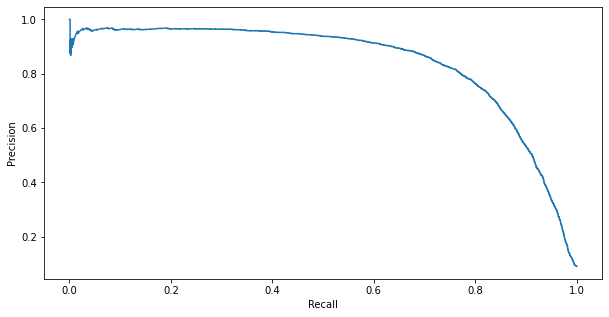

In [59]:
plt.figure(figsize=(10,5))
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")

<font color='blue'> _Avec le modèle d'apprentissage choisi, on avait obtenu une précision de 0.8829 pour un rappel de 0.7078 seulement. On pourrait être tenté de modifier les paramètres pour obtenir un meilleur rappel ; cependant, on constate en observant la courbe ci-dessus qu'une augmentation, même légère, du rappel causerait un effondrement de la précision. Il est donc nécessaire de trouver un compromis entre précision et rappel._ </font>

![prec_reca](https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/320px-Precisionrecall.svg.png)

#### 2.2.4 Courbe ROC:

##### 1. Calculez le taux de faux positifs (tfp), le taux de vrais positifs (tvp) et les seuils utilisés pour classifier les données d’apprentissage. 
Pour ce faire, utilisez la fonction "roc_curve" du sousmodule
"metrics" du module "sklearn"

In [60]:
#from sklearn.metrics import roc_curve

fpr, tpr , threshold = roc_curve(yisfive_train, yisfive_cross_pred_train)

<font color='blue'> _Une courbe ROC (receiver operating characteristic) est un graphique représentant les performances d'un modèle de classification pour tous les seuils (thresholds) de classification. Cette courbe trace le taux de vrais positifs en fonction du taux de faux positifs :_

_Le taux de vrais positifs (TVP ou TPR) est l'équivalent du rappel (sensibilité)\* . Il est donc défini ainsi :_
    $ TPR = \frac{TP}{TP+FN}$

_Le taux de faux positifs (TFP ou FPR) équivaut à [1-spécificité]\** et est donc défini ainsi :_    $ FPR = \frac{FP}{FP+TN}$

_Une courbe ROC trace les valeurs TVP et TFP pour différents seuils de classification. Diminuer la valeur du seuil de classification permet de classer plus d'éléments comme positifs, ce qui augmente le nombre de faux positifs et de vrais positifs._ </font> 

<font color='blue' size=0.18>
* la sensibilité (le rappel) est la capacité du test à indentifier les positifs (par rapport au total des positifs réels)
** la spécificité est la capacité du test à identifier les négatifs (par rapport au total des négatifs réels)</font> 

##### 2. Tracez la courbe des ROC. 
L’axe des abscisses doit contenir les taux de faux positifs et l’axe
des ordonnées doit contenir les taux de vrais positifs. Ajoutez des titres à ces deux axes et
activer le mode "grid" avec la fonction grid de matplotlib

Text(0, 0.5, 'tpr - taux de vrais positifs')

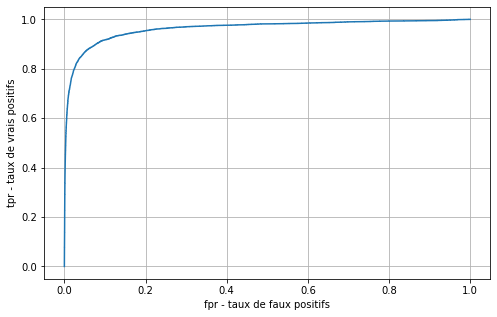

In [61]:
plt.figure(figsize =(8,5))
plt.plot(fpr, tpr)
plt.grid()
plt.xlabel("fpr - taux de faux positifs")
plt.ylabel("tpr - taux de vrais positifs")

##### 3. Calculez l’AUC (Area Under the Curve) du modèle d’apprentissage. 
Pour ce faire, utilisez
la fonction "roc_auc_score" du sous-module "metrics" du module "sklearn".

In [62]:
#from sklearn.metrics import roc_auc_score

aucscore = roc_auc_score(yisfive_train, yisfive_cross_pred_train)
print("Aire sous la courbe ROC :", aucscore)

Aire sous la courbe ROC : 0.96303950712813


__________________________________

## 3 Apprentissage d’un classifieur multi-classes
Dans cette partie, nous allons apprendre un classifieur à classifier les 10 classes (les chiffres de 0 à
9) de la base de données MNIST.

### 3.1 Apprentissage des données

#### 1. En se basant sur le classifieur SGD, faites l’apprentissage du modèle en se basant sur toutes les instances (images) d’apprentissage.
Ainsi le modèle va apprendre à partir de toutes les
classes de la BD et non pas juste à partir de deux classes comme c’était le cas dans la partie
II de TP.

In [89]:
#pour mémoire :
#X_train, X_test = X[:60000], X[60000:]
#y_train, y_test = y[:60000], y[60000:]

allclf = SGDClassifier(loss="hinge", penalty="l2", max_iter=1000, tol=0.001)
allclf.fit(X_train, y_train)

SGDClassifier()

In [90]:
allclf.score(X_train, y_train)

0.9002

#### 2. Via le modèle d’apprentissage bâti, prédisez la classe de la première instance de la base dedonnées (celle de la question 3). La prédiction va être, cette fois-ci, un chiffre de 0 à 9.

In [91]:
inst1_pred = allclf.predict(X[0].reshape(1,len(X[0])))
print("1ere instance >> prédiction :", inst1_pred[0], ">> vraie valeur :", y[0])

1ere instance >> prédiction : 5 >> vraie valeur : 5


In [92]:
#vérification avec une autre instance 
inst15_pred = allclf.predict(X[14].reshape(1,len(X[14])))
print("14eme instance >> prédiction :", inst15_pred[0], ">> vraie valeur :", y[14])

14eme instance >> prédiction : 1 >> vraie valeur : 1


#### 3. En utilisant l’objet qui instancie la classe SGDClassifier :

• Affichez, via la méthode "decision_function", les 10 scores de décision utilisés par la
méthode SGD pour classifier la première instance de la base de données.

In [93]:
allclf.decision_function(X[0].reshape(1,len(X[0])))

array([[-11951.19083298, -34683.82452674,  -7314.89168529,
         -3164.65584347, -25143.22160041,   4731.46410739,
        -26292.60986004, -18266.64256064,  -9243.99893737,
         -9673.71754861]])

• Affichez, via l’attribut "classes_", les différentes classes utilisées par le classifieur. Qu’est
ce que vous remarquez ?

In [94]:
allclf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<font color='blue'> _Les scores ci-dessus correspondent chacun à une de ces dix classes (chiffres de 0 à 9). Le score le plus haut (5440) correspond au chiffre 5, c'est celui qui sera sélectionné pour formuler la prédiction._

### 3.2 Évaluation du modèle d’apprentissage sur les données d’apprentissage

#### 3.2.1 Taux de classification

##### 1. Écrivez un code qui répartit la base d’apprentissage en base d’apprentissage et en base de validation en utilisant la méthode 3-fold cross-validation. 
Optez pour la valeur "accuracy"
pour l’argument "scoring" pour afficher : le taux de classification (accuracy) de chaque fold;
la moyenne des taux de classification

In [95]:
accur = cross_val_score(allclf, X_train, y_train, cv = 3, scoring = "accuracy")

In [96]:
print(">> Taux de classification de chaque fold :", accur)
print(">> Moyenne des taux :", accur.mean())

>> Taux de classification de chaque fold : [0.87235 0.84395 0.86605]
>> Moyenne des taux : 0.8607833333333333


##### 2. Une des techniques d’amélioration des taux de classification est le "Scaling". 
Vérifiez ceci
en appliquant une standardisation sur les données d’apprentissage avec la classe StandartScaler.

In [97]:
# from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

##### 3. Évaluez le modèle sur les nouvelles données d’apprentissage avec une validation croisée de type 3-fold cross-validation. 
Les résultats sont-ils meilleurs que ceux avant le Scaling?

In [ ]:
accur_scaled = cross_val_score(allclf, X_train_scaled, y_train, cv = 3, scoring = "accuracy")

In [ ]:
print("Après Standardisation :")
print(">> Taux de classification de chaque fold :", accur_scaled)
print(">> Moyenne des taux :", accur_scaled.mean())

<font color='blue'> _Les résultats sonts meilleurs après standardisation_

#### 3.2.2 Matrice de Confusion

##### 1. En utilisant le modèle déjà construit du classifieur SGD, prédisez les classes des données d’apprentissage.

In [50]:
y_pred = allclf.predict(X_train_scaled)

##### 2. Affichez la matrice de confusion du modèle d’apprentissage. 
Pour ce faire, utilisez la fonction
"confusion_matrix" du sous-module "metrics" du module "sklearn". La taille de la matrice
de confusion, cette fois-ci, est 10x10 car on traite un problème de classification de 10
classes. Interprétez les résultats.

In [51]:
cmat = confusion_matrix(y_train, y_pred)
print(cmat)

[[3861   41   37    1    2 1930   18   33    0    0]
 [   1 6679    3    0    0   50    0    9    0    0]
 [  74 1432 1352    9   41 2788   83  179    0    0]
 [   5  795   29  127   41 4724   12  398    0    0]
 [   7  800   29    0 1116 3565   20  304    0    1]
 [  13   72    4    1    5 5277   18   30    0    1]
 [  98 1424   92    4    4 2456 1833    7    0    0]
 [   7  180    2    0   10  404    1 5655    0    6]
 [  37 1695   27    0    9 3958   12  113    0    0]
 [  14  286   18    1   28 3390    1 2193    0   18]]


Text(0, 0.5, 'valeurs calculées')

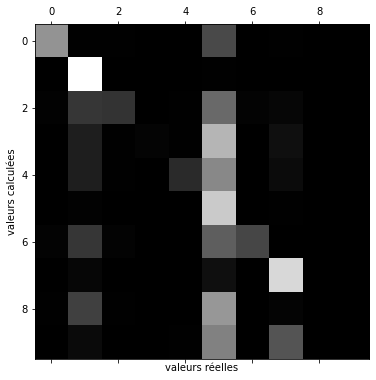

In [52]:
plt.figure(figsize=(6,6))
plt.matshow(cmat,cmap=plt.cm.gray, fignum=1)
plt.xlabel("valeurs réelles")
plt.ylabel("valeurs calculées")

<font color = 'blue'> _Cette matrice de confusion (et sa visalisation) montrent que certaines valurs, comme le 1, et 5 et le 7 sont plutôt bien reconnues, tandis que certaines le sont très mal, comme le 2 et le 3, plus souvent pris pour des 5. Le 8 n'est jamais reconnu (plus souvent pris pour un 1 ou un 5 et le 9 presque jamais (plus souvent pris pour un 5 ou un 7)._





By Youssef Mourchid
© Copyright 2020